# Anti Spoofing

In [ ]:
#Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from skimage.feature import greycomatrix, greycoprops
from skimage import io, color
from skimage.measure import shannon_entropy
from scipy.stats import describe
import mahotas as mh
from scipy.stats import describe

In [ ]:
dataset_dir = r"D:\Qriocity\Secure Vision\Dataset\LCC_FASD\LCC_FASD_training"

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            # Resize images to a fixed size if needed
            # img = cv2.resize(img, (width, height))
            images.append(img)
    return images

# Load real and spoof images
real_images = load_images(os.path.join(dataset_dir, "real"))
spoof_images = load_images(os.path.join(dataset_dir, "spoof"))






In [ ]:
# Basic dataset statistics
total_real_images = len(real_images)
total_spoof_images = len(spoof_images)
print("Total real images:", total_real_images)
print("Total spoof images:", total_spoof_images)


Total real images: 1223
Total spoof images: 7076


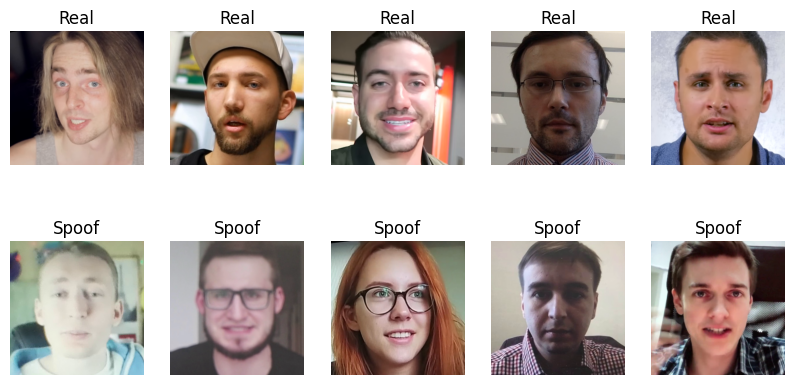

In [ ]:
import random

# Select random images
random_real_images = random.sample(real_images, 5)
random_spoof_images = random.sample(spoof_images, 5)

# Display random sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(random_real_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Real")
    plt.axis('off')
    plt.subplot(2, 5, 6+i)
    plt.imshow(cv2.cvtColor(random_spoof_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Spoof")
    plt.axis('off')
plt.show()


In [ ]:
# EDA - Image dimensions
real_dims = np.array([img.shape[:2] for img in real_images])
spoof_dims = np.array([img.shape[:2] for img in spoof_images])


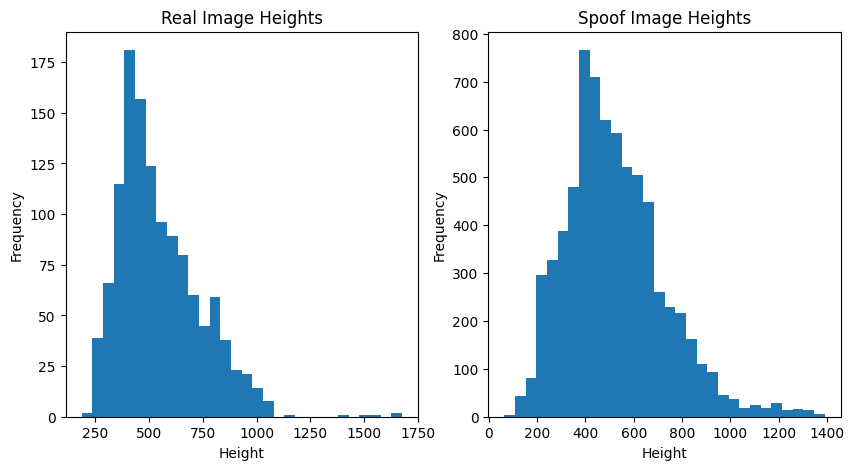

In [ ]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(real_dims[:, 0], bins=30)
plt.title('Real Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(spoof_dims[:, 0], bins=30)
plt.title('Spoof Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Color Distribution Analysis
real_colors = np.concatenate([img.reshape(-1, 3) for img in real_images], axis=0)
spoof_colors = np.concatenate([img.reshape(-1, 3) for img in spoof_images], axis=0)

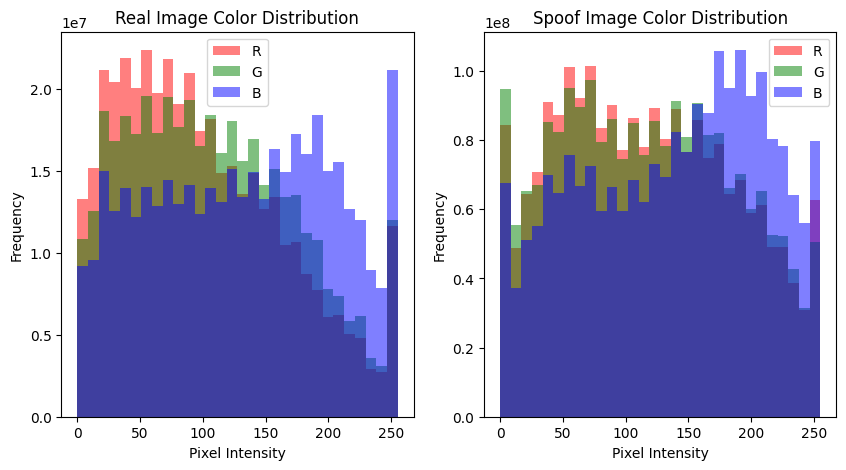

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(real_colors[:, 0], bins=30, color='red', alpha=0.5, label='R')
plt.hist(real_colors[:, 1], bins=30, color='green', alpha=0.5, label='G')
plt.hist(real_colors[:, 2], bins=30, color='blue', alpha=0.5, label='B')
plt.title('Real Image Color Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(spoof_colors[:, 0], bins=30, color='red', alpha=0.5, label='R')
plt.hist(spoof_colors[:, 1], bins=30, color='green', alpha=0.5, label='G')
plt.hist(spoof_colors[:, 2], bins=30, color='blue', alpha=0.5, label='B')
plt.title('Spoof Image Color Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Image Quality Assessment
def compute_image_quality(images):
    quality_metrics = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sharpness = cv2.Laplacian(gray_img, cv2.CV_64F).var()
        brightness = np.mean(gray_img)
        contrast = np.std(gray_img)
        quality_metrics.append([sharpness, brightness, contrast])
    return np.array(quality_metrics)


In [ ]:
real_quality_metrics = compute_image_quality(real_images)
spoof_quality_metrics = compute_image_quality(spoof_images)

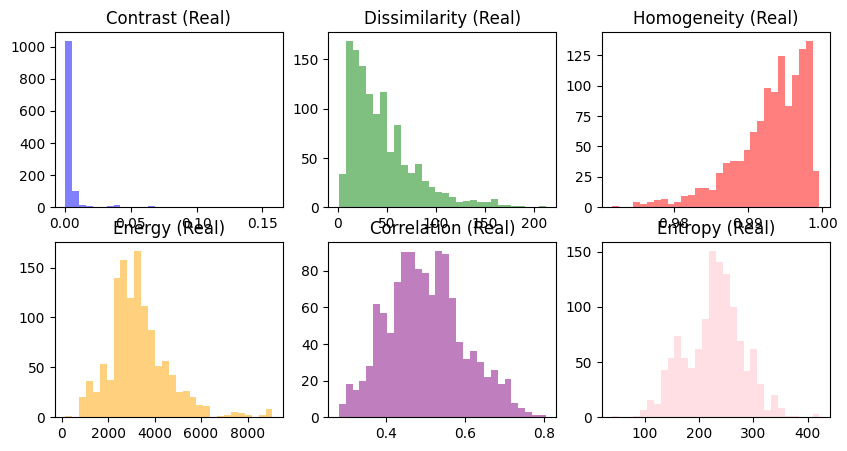

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.hist(real_texture_features[:, 0], bins=30, color='blue', alpha=0.5)
plt.title('Contrast (Real)')
plt.subplot(2, 3, 2)
plt.hist(real_texture_features[:, 1], bins=30, color='green', alpha=0.5)
plt.title('Dissimilarity (Real)')
plt.subplot(2, 3, 3)
plt.hist(real_texture_features[:, 2], bins=30, color='red', alpha=0.5)
plt.title('Homogeneity (Real)')
plt.subplot(2, 3, 4)
plt.hist(real_texture_features[:, 3], bins=30, color='orange', alpha=0.5)
plt.title('Energy (Real)')
plt.subplot(2, 3, 5)
plt.hist(real_texture_features[:, 4], bins=30, color='purple', alpha=0.5)
plt.title('Correlation (Real)')
plt.subplot(2, 3, 6)
plt.hist(real_texture_features[:, 5], bins=30, color='pink', alpha=0.5)
plt.title('Entropy (Real)')
plt.show()

In [ ]:
# Texture Analysis
def compute_texture_features(images):
    features = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        texture = mh.features.haralick(gray_img).mean(axis=0)
        features.append(texture)
    return np.array(features)

In [ ]:
real_texture_features = compute_texture_features(real_images)
spoof_texture_features = compute_texture_features(spoof_images)



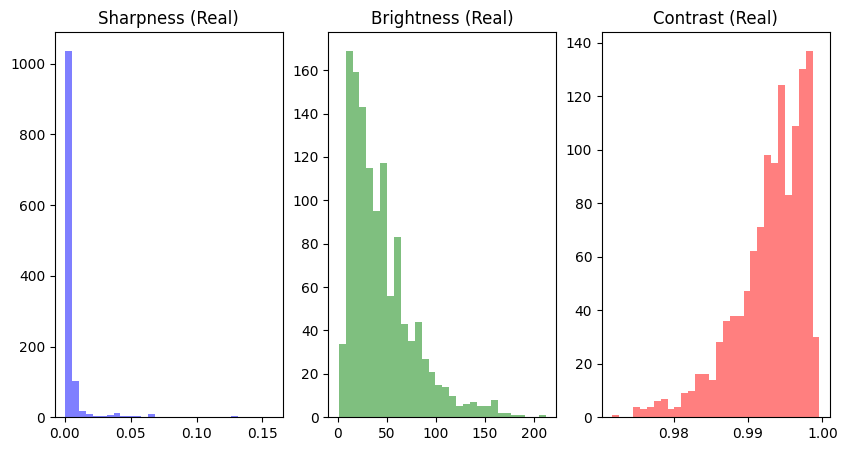

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(real_texture_features[:, 0], bins=30, color='blue', alpha=0.5)
plt.title('Sharpness (Real)')
plt.subplot(1, 3, 2)
plt.hist(real_texture_features[:, 1], bins=30, color='green', alpha=0.5)
plt.title('Brightness (Real)')
plt.subplot(1, 3, 3)
plt.hist(real_texture_features[:, 2], bins=30, color='red', alpha=0.5)
plt.title('Contrast (Real)')
plt.show()


In [ ]:
# Statistical Analysis
print("Texture Features (Real):")
print(describe(real_texture_features, axis=0))
print("Texture Features (Spoof):")
print(describe(spoof_texture_features, axis=0))
print("Image Quality Metrics (Real):")
print(describe(real_quality_metrics, axis=0))
print("Image Quality Metrics (Spoof):")
print(describe(spoof_quality_metrics, axis=0))

Texture Features (Real):
DescribeResult(nobs=1223, minmax=(array([ 2.98521303e-04,  8.70671957e-01,  9.71717840e-01,  1.59351758e+02,
        2.79323852e-01,  4.02671273e+01,  6.35764401e+02,  5.55569379e+00,
        6.36596733e+00,  3.37687078e-04,  1.38121245e+00, -7.49471335e-01,
        9.97684453e-01]), array([ 1.57546201e-01,  2.12444153e+02,  9.99618033e-01,  9.06903807e+03,
        8.04629184e-01,  4.21352341e+02,  3.62426945e+04,  8.83949213e+00,
        1.26144725e+01,  1.10850280e-02,  4.24189061e+00, -3.58084983e-01,
        9.99989515e-01])), mean=array([ 5.53701674e-03,  4.41222409e+01,  9.93006433e-01,  3.31139806e+03,
        5.00385322e-01,  2.27140011e+02,  1.32014700e+04,  8.25959292e+00,
        1.06649859e+01,  9.12774444e-04,  2.92097082e+00, -5.44388191e-01,
        9.99702321e-01]), variance=array([2.37589880e-04, 1.07508008e+03, 2.27747063e-05, 1.65073565e+06,
       9.47888999e-03, 2.86764522e+03, 2.63199177e+07, 1.64127539e-01,
       7.04614220e-01, 1.979751

## Model Tensorflow

In [ ]:
import os
import glob
import shutil

import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import tensorflow as tf

# Import packages for data handling
#import h5py
from PIL import Image
from skimage.io import imread
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

# Import deep learning package (tensorflow)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

color = sns.color_palette()
%matplotlib inline

# Set seed nunmber to all packages
seed_number = 24
np.random.seed(seed_number)
tf.random.set_seed(seed_number)

In [ ]:
import os

# Set the root directory
root = r"D:\Qriocity\Secure Vision\Dataset"

# Define input directories
input_dir = os.path.join(root, "LCC_FASD")
train_dir = os.path.join(input_dir, 'LCC_FASD_training')
val_dir = os.path.join(input_dir, 'LCC_FASD_development')
test_dir = os.path.join(input_dir, 'LCC_FASD_evaluation')

# List dataset sub-directories and label names
dataset_dir = [dir for dir in sorted(os.listdir(input_dir)) if os.path.isdir(os.path.join(input_dir, dir))]
label_name = [subdir for subdir in sorted(os.listdir(train_dir)) if os.path.isdir(os.path.join(train_dir, subdir))]

# Printing the directory information
print(f"Main directories\t: {os.listdir(root)}")
print(f"Dataset sub-directories\t: {dataset_dir}")
print(f"Train set directory\t: {label_name}")


Main directories	: ['LCC_FASD', 'test_texture_features.csv', 'train_texture_features.csv', 'val_texture_features.csv']
Dataset sub-directories	: ['LCC_FASD_development', 'LCC_FASD_evaluation', 'LCC_FASD_training']
Train set directory	: ['real', 'spoof']


In [ ]:
dir_dict = {'train': train_dir, 'val': val_dir, 'test': test_dir}
case_count, img_disp, set_length  = {}, {}, {}

for key, val in dir_dict.items():
    case_count[key] = {}
    img_disp[key] = {}
    set_count = 0

    for label in label_name:
        label_list = list(sorted(glob.glob(os.path.join(val, label, "*.png"))))
        if len(label_list) == 0:
          continue

        case_count[key][label] = len(label_list)
        set_count += len(label_list)

        select_img_id = np.random.randint(len(label_list)-1)
        # print(select_img_id)
        img_disp[key][label] = label_list[select_img_id]

    set_length[key] = set_count

case_count_df = pd.DataFrame(case_count)
img_disp_df = pd.DataFrame(img_disp)
print(f"Dataset summary:\n\n{case_count_df}")

Dataset summary:

       train   val  test
real    1223   405   314
spoof   3100  2543  7266


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.15,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,
                                   fill_mode="nearest")

val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255) if set_length["test"] > 0 else None

Found 4323 images belonging to 2 classes.
Found 2948 images belonging to 2 classes.
Found 7580 images belonging to 2 classes.


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the root directory
root = r"D:\Qriocity\Secure Vision\Dataset"

# Define input directories
input_dir = os.path.join(root, "LCC_FASD")
train_dir = os.path.join(input_dir, 'LCC_FASD_training')
val_dir = os.path.join(input_dir, 'LCC_FASD_development')
test_dir = os.path.join(input_dir, 'LCC_FASD_evaluation')

# Initialize data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) if os.path.exists(test_dir) else None

# Define parameters
train_batch_size = 16
val_batch_size = 16
img_width = 224
img_height = 224

# Generate dataset for train, val and test
train_gen = train_datagen.flow_from_directory(train_dir,
                                              batch_size=train_batch_size,
                                              class_mode='binary',
                                              target_size=(img_width, img_height),
                                              shuffle=False)

val_gen = val_datagen.flow_from_directory(val_dir,
                                          batch_size=val_batch_size,
                                          class_mode='binary',
                                          target_size=(img_width, img_height),
                                          shuffle=False)

if test_datagen is not None:
    test_gen = test_datagen.flow_from_directory(test_dir,
                                                batch_size=1,
                                                class_mode='binary',
                                                target_size=(img_width, img_height),
                                                shuffle=False)
else:
    test_gen = None

# Function to compute statistical texture features for a single image
def compute_texture_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute statistical texture features
    mean_intensity = np.mean(gray_image)
    std_intensity = np.std(gray_image)
    entropy = -np.sum(np.multiply(gray_image / 255.0, np.log2(gray_image / 255.0 + np.finfo(float).eps)))
    # Add more features as needed

    return [mean_intensity, std_intensity, entropy]

# Function to extract texture features for a batch of images
def extract_texture_features(generator):
    features = []
    for _ in range(generator.n // generator.batch_size + 1):
        batch_images, _ = next(generator)
        for img in batch_images:
            texture_features = compute_texture_features(img)
            features.append(texture_features)
    return np.array(features)

# Extract texture features for train, val, and test sets
train_texture_features = extract_texture_features(train_gen)
val_texture_features = extract_texture_features(val_gen)
test_texture_features = extract_texture_features(test_gen) if test_gen is not None else None

# Store the computed texture features in a DataFrame
train_texture_df = pd.DataFrame(train_texture_features, columns=['Mean_Intensity', 'Std_Intensity', 'Entropy'])
val_texture_df = pd.DataFrame(val_texture_features, columns=['Mean_Intensity', 'Std_Intensity', 'Entropy'])
test_texture_df = pd.DataFrame(test_texture_features, columns=['Mean_Intensity', 'Std_Intensity', 'Entropy']) if test_texture_features is not None else None

# Save the texture features to CSV files
train_texture_df.to_csv(os.path.join(root, "train_texture_features.csv"), index=False)
val_texture_df.to_csv(os.path.join(root, "val_texture_features.csv"), index=False)
if test_texture_df is not None:
    test_texture_df.to_csv(os.path.join(root, "test_texture_features.csv"), index=False)


In [ ]:
# Define dataset properties
train_batch_size = 16
val_batch_size = 16
img_width = 224
img_height = 224

# Generate dataset for train, val and test
train_gen = train_datagen.flow_from_directory(train_dir,
                                              batch_size = train_batch_size,
                                              class_mode = 'binary',
                                              target_size = (img_width, img_height),
                                              seed = seed_number)

val_gen = val_datagen.flow_from_directory(val_dir,
                                          batch_size = val_batch_size,
                                          class_mode = 'binary',
                                          target_size = (img_width, img_height),
                                          seed = seed_number)

if test_datagen is not None:
  test_gen = test_datagen.flow_from_directory(test_dir,
                                              batch_size = 1,
                                              class_mode = 'binary',
                                              target_size = (img_width, img_height),
                                              seed = seed_number,
                                              shuffle=False)
else:
  test_gen = None

In [ ]:
 #Displaying the dataset generator information
print(f'Train set batch shape\t: {next(train_gen)[0].shape}')
print(f'Val set batch shape\t: {next(val_gen)[0].shape}')
print(f'Test set batch shape\t: {next(test_gen)[0].shape}') if test_gen is not None else None

Train set batch shape	: (16, 224, 224, 3)
Val set batch shape	: (16, 224, 224, 3)
Test set batch shape	: (1, 224, 224, 3)


In [ ]:
pretrain_net = mobilenet_v2.MobileNetV2(input_shape = (img_width, img_height, 3),
                                        include_top = False,
                                        weights = 'imagenet')

# ------ Freezing layer(s) up to a specific layer ------
freeze_before = None

if freeze_before:
    for layer in pretrain_net.layers:
        if layer.name == freeze_before:
            break
        else:
            layer.trainable = False

In [ ]:
# Adding extra layer for our problem
x = pretrain_net.output
x = Conv2D(32, (3, 3), activation='relu')(x)
x = Dropout(rate=0.2, name='extra_dropout1')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(units=128, activation='relu', name='extra_fc1')(x)
x = Dropout(rate=0.2, name='extra_dropout2')(x)
x = Dense(1, activation='sigmoid', name='classifier')(x)

model = Model(inputs=pretrain_net.input, outputs=x, name='mobilenetv2_spoof')
print(model.summary())


Model: "mobilenetv2_spoof"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                 

In [ ]:
train_id = "lcc-train04b-weight_all"  # ID of the training procedure
num_epochs = 10  # Set the number of epochs to train
learning_rate = 1e-5  # Set the learning rate to use

print(f"Training config of '{train_id}'...")
print(f"Number of epoch\t: {num_epochs}")
print(f"Initial LR\t: {learning_rate}")

model.compile(optimizer = Adam(lr=learning_rate),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# Define model callback
save_dir = os.path.join("./", train_id)
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)

cont_filepath = "mobilenetv2-epoch_{epoch:02d}.hdf5"
cont_checkpoint = ModelCheckpoint(os.path.join(save_dir, cont_filepath))

best_filepath = "mobilenetv2-best.hdf5"
best_checkpoint = ModelCheckpoint(os.path.join(save_dir, best_filepath),
                                  save_best_only=True,
                                  save_weights_only=True)

# Instantiate tensorboard
log_dir = os.path.join(save_dir, "logs")
use_tensorboard = TensorBoard(log_dir=log_dir,
                              histogram_freq=1,
                              update_freq="batch")

# Instantiate learning rate scheduler with Plateau method
plateau_scheduler = ReduceLROnPlateau(factor=0.2, patience=3, verbose=1,
                                      min_delta= 0.005, min_lr=5e-7)

# Define class weight
train_length = len(train_gen.classes)
weight0 = train_length / case_count_df['train'][label_name[0]] * (1 / len(label_name))
weight1 = train_length / case_count_df['train'][label_name[1]] * (1 / len(label_name))
class_weight = {0: weight0, 1: weight1}

print(f"Class weight\t: {class_weight}")

Training config of 'lcc-train04b-weight_all'...
Number of epoch	: 10
Initial LR	: 1e-05
Class weight	: {0: 1.767375306623058, 1: 0.697258064516129}


C:\Users\shubh\anaconda3\envs\tfgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:

# Perform training
history = model.fit(train_gen,
                    epochs = num_epochs,
                    steps_per_epoch = set_length['train'] // train_batch_size,
                    validation_data = val_gen,
                    validation_steps = 1,
                    callbacks = [best_checkpoint,
                                 cont_checkpoint,
                                 plateau_scheduler],
                    class_weight=class_weight)

history_df = pd.DataFrame.from_dict(history.history)
history_df.to_csv(os.path.join(save_dir, "history.csv"), index=False)

Epoch 1/10
270/270 [==============================] - 112s 380ms/step - loss: 0.5240 - acc: 0.7492 - val_loss: 0.4789 - val_acc: 0.7500 - lr: 1.0000e-05
Epoch 2/10
270/270 [==============================] - 82s 304ms/step - loss: 0.2803 - acc: 0.8918 - val_loss: 0.4307 - val_acc: 0.7500 - lr: 1.0000e-05
Epoch 3/10
270/270 [==============================] - 83s 309ms/step - loss: 0.1864 - acc: 0.9264 - val_loss: 0.4322 - val_acc: 0.8125 - lr: 1.0000e-05
Epoch 4/10
270/270 [==============================] - 83s 307ms/step - loss: 0.1496 - acc: 0.9436 - val_loss: 0.5142 - val_acc: 0.7500 - lr: 1.0000e-05
Epoch 5/10
270/270 [==============================] - 83s 308ms/step - loss: 0.1255 - acc: 0.9515 - val_loss: 0.0328 - val_acc: 1.0000 - lr: 1.0000e-05
Epoch 6/10
270/270 [==============================] - 86s 317ms/step - loss: 0.1061 - acc: 0.9587 - val_loss: 0.4634 - val_acc: 0.8750 - lr: 1.0000e-05
Epoch 7/10
270/270 [==============================] - 84s 310ms/step - loss: 0.0990 - a

In [ ]:
# Test set accuracy and loss
test_scores = model.evaluate(test_gen, steps=set_length['test'])
print("Test results Accuracy: {0:.2f}% and Loss: {0:.2f}".format(test_scores[1]*100, test_scores[0]))

# Calculate prediction
threshold = 0.5  # Define the sigmoid threshold for True or False
y_pred_value = np.squeeze(model.predict(test_gen, steps=set_length['test'], verbose=1))

y_pred = np.zeros(y_pred_value.shape).astype(np.int32)  # Sigmoid
y_pred[y_pred_value > threshold] = 1

# y_pred = np.argmax(y_pred_value, axis=-1).astype(np.int32)  # Softmax

y_true = test_gen.classes

# Sanity check on the y_pred and y_true value
print(f"Label\t\t: {y_true[:10]}")
print(f"Prediction\t: {y_pred[:10]}")

7580/7580 [==============================] - 142s 19ms/step - loss: 0.1541 - acc: 0.9391
Test results Accuracy: 93.91% and Loss: 93.91
7580/7580 [==============================] - 99s 13ms/step
Label		: [0 0 0 0 0 0 0 0 0 0]
Prediction	: [0 0 0 0 0 1 0 0 0 0]


In [ ]:
from tensorflow.keras.models import load_model

# Replace 'mobilenetv2_spoof.hdf5' with the actual filename of your saved model
model = load_model(r"D:\Qriocity\Secure Vision\lcc-train04b-weight_all\mobilenetv2-epoch_05.hdf5")


In [ ]:
import cv2

# Replace 'path/to/your/image.jpg' with the actual path to your image
img = cv2.imread(r"D:\Qriocity\Secure Vision\Dataset\LCC_FASD\LCC_FASD_training\spoof\FT720P_IIYAMAGB_IPHONE5SB_id1_s0_30.png")
img = cv2.resize(img, (224, 224))
img = img.astype('float32') / 255.0


In [ ]:
img = np.expand_dims(img, axis=0)  # Add a batch dimension


In [ ]:
predictions = model.predict(img)


1/1 [==============================] - 0s 21ms/step


In [ ]:
# Assuming predictions is a NumPy array as described above
predicted_class = np.argmax(predictions[0])
predicted_proba = predictions[0][predicted_class]

print(f"Predicted class: {predicted_class}")  # 0 or 1 based on your class labels
print(f"Predicted probability: {predicted_proba:.4f}")


Predicted class: 0
Predicted probability: 0.2284


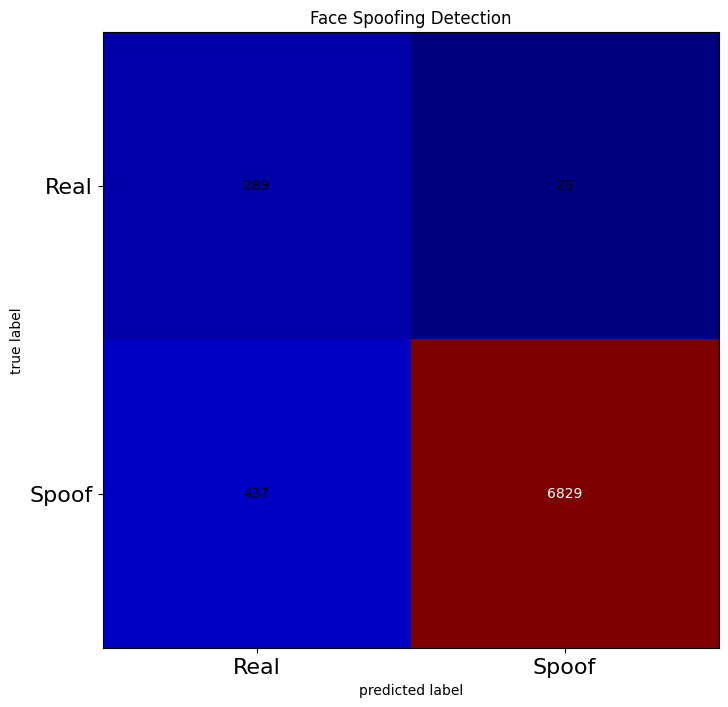

Report Summary:
Precision	: 99.64%
Recall		: 93.99%
F1 Score	: 96.73%

Notes: 
True labels	: Spoof
False labels	: Real


In [ ]:
# Confusion matrix result
confusion_matrix_result = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(confusion_matrix_result,
                      figsize=(12,8),
                      hide_ticks=True,
                      cmap=plt.cm.jet)
plt.title("Face Spoofing Detection")
plt.xticks(range(2), ['Real', 'Spoof'], fontsize=16)
plt.yticks(range(2), ['Real', 'Spoof'], fontsize=16)
plt.show()

# Precision and Recall metrics
tn, fp, fn, tp = confusion_matrix_result.ravel()
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1_score = 2 * precision * recall / (precision+recall)

print("Report Summary:")
print("Precision\t: {:.2f}%".format(precision*100))
print("Recall\t\t: {:.2f}%".format(recall*100))
print("F1 Score\t: {:.2f}%".format(f1_score*100))

print("\nNotes: ")
print("True labels\t: Spoof")
print("False labels\t: Real")

Found 4323 images belonging to 2 classes.
Found 2948 images belonging to 2 classes.
Found 7580 images belonging to 2 classes.


# Deep Fake Detection

## Dataset prepration

In [ ]:
import os
import pandas as pd

def load_dataset(folder_path):
    dataset = pd.DataFrame(columns=['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'])

    # Iterate over train, test, and val folders
    for split in ['train', 'test', 'val']:
        split_folder = os.path.join(folder_path, split)
        annotations_file = os.path.join(split_folder, f'_annotations.csv')
        images_folder = os.path.join(split_folder, 'images')

        # Check if annotations file exists
        if os.path.isfile(annotations_file):
            # Read annotations CSV file
            annotations_df = pd.read_csv(annotations_file)

            # Concatenate image paths
            annotations_df['filename'] = annotations_df['filename'].apply(lambda x: os.path.join(images_folder, x))

            # Append to dataset
            dataset = pd.concat([dataset, annotations_df])

    return dataset

# Specify the folder path containing the dataset
folder_path = r'C:\Users\shubh\Downloads\Deepfake detection.v1i.tensorflow'

# Load the dataset
dataset = load_dataset(folder_path)

# Display the loaded dataset
print(dataset.head())


                                            filename width height class xmin  \
0  C:\Users\shubh\Downloads\Deepfake detection.v1...   416    416  Fake   91   
1  C:\Users\shubh\Downloads\Deepfake detection.v1...   416    416  Fake   89   
2  C:\Users\shubh\Downloads\Deepfake detection.v1...   416    416  Fake   32   
3  C:\Users\shubh\Downloads\Deepfake detection.v1...   416    416  Real  109   
4  C:\Users\shubh\Downloads\Deepfake detection.v1...   416    416  Fake   14   

  ymin xmax ymax  
0   28  324  324  
1   22  335  318  
2    0  325  331  
3   59  302  294  
4    8  321  364  


In [ ]:
import os
import pandas as pd
import tensorflow as tf
import logging

logging.basicConfig(level=logging.INFO)

def load_dataset(folder_path):
    dataset = pd.DataFrame(columns=['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'])

    # Iterate over train, test, and val folders
    for split in ['train', 'test', 'val']:
        split_folder = os.path.join(folder_path, split)
        annotations_file = os.path.join(split_folder, f'_annotations.csv')

        # Check if annotations file exists
        if os.path.isfile(annotations_file):
            # Read annotations CSV file
            annotations_df = pd.read_csv(annotations_file)

            # Concatenate image paths
            annotations_df['filename'] = annotations_df['filename'].apply(lambda x: os.path.join(split_folder, x))

            # Append to dataset
            dataset = pd.concat([dataset, annotations_df])

    return dataset

def preprocess_image(image_path, target_size=(224, 224)):
    try:
        # Check if the file exists
        if not os.path.exists(image_path):
            logging.error(f"File not found: {image_path}")
            return None

        # Read and decode the image file
        img = tf.io.read_file(image_path)
        img = tf.image.decode_jpeg(img, channels=3)

        # Resize the image to the target size
        img = tf.image.resize(img, target_size)

        # Normalize pixel values to be in the range [0, 1]
        img = img / 255.0

        return img
    except Exception as e:
        logging.error(f"Error preprocessing image {image_path}: {e}")
        return None

# Load the dataset
folder_path = r'C:\Users\shubh\Downloads\Deepfake detection.v1i.tensorflow'
dataset = load_dataset(folder_path)

# Preprocess images in batches
BATCH_SIZE = 32
images = []
for i in range(0, len(dataset), BATCH_SIZE):
    batch_dataset = dataset.iloc[i:i + BATCH_SIZE]
    batch_image_paths = batch_dataset['filename'].values
    batch_images = [preprocess_image(image_path) for image_path in batch_image_paths if preprocess_image(image_path) is not None]
    images.extend(batch_images)

# Check the length of the preprocessed images
logging.info("Number of preprocessed images: %d", len(images))


INFO:root:Number of preprocessed images: 16782


In [ ]:
# Extracting labels
labels = dataset['class'].values
labels

array(['Fake', 'Fake', 'Fake', ..., 'Fake', 'Real', 'Fake'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Extracting labels
labels = dataset['class'].values

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder()

# Reshape labels to fit OneHotEncoder requirements
labels = labels.reshape(-1, 1)

# Fit and transform the labels
onehot_labels = onehot_encoder.fit_transform(labels)

# Check the shape of one-hot encoded labels
print("Shape of one-hot encoded labels:", onehot_labels.shape)


Shape of one-hot encoded labels: (16782, 2)


In [ ]:
onehot_labels_dense = onehot_labels.toarray()
onehot_labels_dense

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into training, validation, and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)  # Splitting the training data further into training and validation

# Check the lengths of each split
print("Training data:", len(train_data))
print("Validation data:", len(val_data))
print("Test data:", len(test_data))


Training data: 12082
Validation data: 1343
Test data: 3357


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
num_classes=2
# Add new classification layers
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(num_classes, activation='softmax')(x)

# Create the fine-tuned model
model = models.Model(inputs=base_model.input, outputs=output)
num_epochs=10
# Comnum_epochs=10pile the model
model.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=num_epochs)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)

# Fine-tune the model (unfreeze some layers if needed)
for layer in model.layers[-10:]:
    layer.trainable = True
num_epochs=10
# Recompile the model
model.compile(optimizer=optimizers.Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
history = model.fit(train_data, validation_data=val_data, epochs=num_epochs)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Video_Predictions

In [1]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
video_fil = []
train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil += glob.glob('D:\Qriocity\Secure Vision\Dataset\DFDC_REAL_Face_only_data\*.mp4')
video_fil += glob.glob('D:\Qriocity\Secure Vision\Dataset\DFDC_FAKE_Face_only_data\*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 3293
['D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\aabqyygbaa.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\aajsqyyjni.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\aayfryxljh.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\abbgqbrdiz.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\abmjszfycr.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\abzdxpmmdb.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\acgzblwsgw.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\addknoverp.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\adgveaibmt.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\adkymkuove.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\adohdulfwb.mp4', 'D:\\Qriocity\\Secure Vision\\Dataset\\DFDC_REAL_Face_only_data\\advzry

In [2]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files=[]
video_files += glob.glob('D:\Qriocity\Secure Vision\Dataset\DFDC_REAL_Face_only_data/*.mp4')
video_files += glob.glob('D:\Qriocity\Secure Vision\Dataset\DFDC_FAKE_Face_only_data/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))
     

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 128, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 113, 148, 148, 148, 148, 148, 148, 148, 147, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 146, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 146, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [3]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

class VideoDataset(Dataset):
    def __init__(self, video_names, labels, sequence_length=60, transform=None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.video_names)

    def __getitem__(self, idx):
        video_path = self.video_names[idx]
        frames = []
        count = int(100 / self.sequence_length)
        temp_video = os.path.basename(video_path)
        label = self.labels.loc[self.labels[0] == temp_video, 1].values[0]
        label = 0 if label == 'FAKE' else 1  # Convert label to numerical value
        vidObj = cv2.VideoCapture(video_path)
        success = 1
        while success:
            success, image = vidObj.read()
            if success:
                frames.append(self.transform(image))
                if len(frames) == self.sequence_length:
                    break
        frames = torch.stack(frames)
        frames = frames[:self.sequence_length]
        return frames, label

    def transform(self, image):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image



In [4]:
def number_of_real_and_fake_videos(data_list):
    lab = pd.read_csv(r"C:\Users\shubh\Downloads\Gobal_metadata.csv", header=None)
    fake = 0
    real = 0
    for i in data_list:
        temp_video = i.split('/')[-1]
        matching_rows = lab.loc[lab.iloc[:, 0] == temp_video].index.values
        if len(matching_rows) > 0:
            label = lab.iloc[matching_rows[0], 1]
            if label == 'FAKE':
                fake += 1
            elif label == 'REAL':
                real += 1
    return real, fake


In [5]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

class VideoDataset(Dataset):
    def __init__(self, video_names, labels, sequence_length=60, transform=None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.video_names)

    def __getitem__(self, idx):
        video_path = self.video_names[idx]
        frames = []
        count = int(100 / self.sequence_length)
        temp_video = os.path.basename(video_path)
        try:
            label = self.labels.loc[self.labels[0] == temp_video, 1].values[0]
        except IndexError:
            print(f"Error: Label not found for video '{temp_video}'")
            return None, None
        label = 0 if label == 'FAKE' else 1  # Convert label to numerical value
        vidObj = cv2.VideoCapture(video_path)
        success = 1
        while success:
            success, image = vidObj.read()
            if success:
                frames.append(self.transform(image))
                if len(frames) == self.sequence_length:
                    break
        frames = torch.stack(frames)
        frames = frames[:self.sequence_length]
        return frames, label

    def transform(self, image):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image

# Plot the image
def plot_image(tensor):
    image = tensor.cpu().numpy().transpose(1, 2, 0)
    b, g, r = cv2.split(image)
    image = cv2.merge((r, g, b))
    image = image * [0.22803, 0.22145, 0.216989] + [0.43216, 0.394666, 0.37645]
    image = image * 255.0
    plt.imshow(image.astype(int))
    plt.show()

def number_of_real_and_fake_videos(data_list):
    lab = pd.read_csv(r"C:\Users\shubh\Downloads\Gobal_metadata.csv", header=None)
    fake = 0
    real = 0
    for i in data_list:
        temp_video = os.path.basename(i)
        matching_rows = lab.loc[lab.iloc[:, 0] == temp_video].index.values
        if len(matching_rows) > 0:
            label = lab.iloc[matching_rows[0], 1]
            if label == 'FAKE':
                fake += 1
            elif label == 'REAL':
                real += 1
    return real, fake

In [6]:
# Plot the image
def plot_image(tensor):
    image = tensor.cpu().numpy().transpose(1, 2, 0)
    b, g, r = cv2.split(image)
    image = cv2.merge((r, g, b))
    image = image * [0.22803, 0.22145, 0.216989] + [0.43216, 0.394666, 0.37645]
    image = image * 255.0
    plt.imshow(image.astype(int))
    plt.show()


train: 2617
test: 655
TRAIN:  Real: 1375  Fake: 1242


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TEST:  Real: 346  Fake: 309


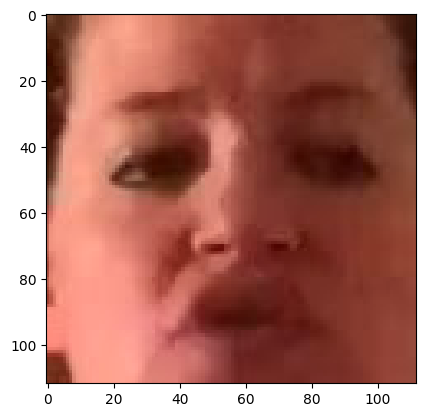

In [7]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

labels = pd.read_csv(r"C:\Users\shubh\Downloads\Gobal_metadata.csv", header=None)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]

print("train:", len(train_videos))
print("test:", len(valid_videos))

print("TRAIN: ", "Real:", number_of_real_and_fake_videos(train_videos)[0], " Fake:", number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:", number_of_real_and_fake_videos(valid_videos)[0], " Fake:", number_of_real_and_fake_videos(valid_videos)[1])



im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = VideoDataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = VideoDataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 2,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 2,shuffle = True,num_workers = 4)
image,label = train_data[0]
plot_image(image[0,:,:,:])

In [8]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [9]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

C:\Users\shubh\anaconda3\envs\ns\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\shubh\anaconda3\envs\ns\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
pip install wandb

Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
import wandb
from tqdm import tqdm

def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    wandb.init(project='DEEPFAKE', name='training_run')
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _, outputs = model(inputs)
        loss = criterion(outputs, targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        wandb.log({"loss": losses.avg, "accuracy": accuracies.avg})
    torch.save(model.state_dict(), 'D:\Qriocity\Secure Vision\DEEPFAKE.pt')
    return losses.avg, accuracies.avg

def test(epoch, model, data_loader, criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    wandb.init(project='DEEPFAKE', name='testing_run')
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _, outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
            _, p = torch.max(outputs, 1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            wandb.log({"loss": losses.avg, "accuracy": accuracies.avg})
    print('\nAccuracy {}'.format(accuracies.avg))
    return true, pred, losses.avg, accuracies.avg

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [12]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [13]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs 
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)
     

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: shubh4m. Use `wandb login --relogin` to force relogin
